In [1]:
# import packages
import datetime
import pandas as pd
import numpy as np
import keras.backend as K
from keras.models import Model
from keras.models import load_model
from keras.layers import Input, Embedding, LSTM, Merge
from gensim import models
from gensim.models import KeyedVectors
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.preprocessing.sequence import pad_sequences
import itertools
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# load data
TRAIN_CSV = 'train_set_O2.csv'
TEST_CSV = 'test_set_O2.csv'

saved_weights = "siamese_model_100DW2V_2HL_50HU_O2.hdf5"

# Inpute size
w2v_dim = 100

In [3]:
# Load a trained w2v model
model = models.Word2Vec.load('100D_MinWordCount0_downSample1e-5_trained100epoch_L.w2v')

In [4]:
# define function to plot t-sne
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [7]:
# time expensive
tsne_plot(model)

/home/chenzhi/.conda/envs/nmt4binaries/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


KeyboardInterrupt: 

In [4]:
# define function to t-sne
def tsne(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    return labels, new_values

In [5]:
print(datetime.datetime.now())
labels, new_values = tsne(model)
print(datetime.datetime.now())

2019-05-16 11:17:47.784587


/home/chenzhi/.conda/envs/nmt4binaries/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


2019-05-16 11:47:41.294642


In [6]:
len(new_values)

49760

In [7]:
type(new_values)

numpy.ndarray

In [9]:
new_values[0]

array([-67.249344,  51.823288], dtype=float32)

In [17]:
instructions = ["MOVQ~RCX,[R12,RAX]", "MOVQ~RDX,[RBX,RAX]", "MOVZBL~EDX,[RBX,RAX]", "MOVB~[R15,RAX+0],CL",
               "MOVB~[RBX,RAX+0],CL", "MOVQ~[RBX,RAX,0-0],RCX", "MOVZBL~ECX,<TAG>[RCX+0]", 
               "MOVB~[RDX,RDI,0],CL", "MOVB~[RSP,RAX,0+0],DL"]

In [21]:
def find_index_from_label(insts, labels):
    index = []
    for inst in insts:
        if inst in labels:
            index.append(labels.index(inst))
        else:
            index.append(-1)
    return index

In [22]:
print(find_index_from_label(instructions, labels))

[24937, 29202, 2961, 5836, 2201, 49064, 12908, 22380, 10747]


In [23]:
print(new_values[find_index_from_label(instructions, labels)])

[[-37.78545   82.18236 ]
 [-37.810646  81.85208 ]
 [-36.98798   79.24918 ]
 [-38.703255  78.577156]
 [-38.649414  78.791016]
 [-41.177296  78.626945]
 [-98.97305   67.202515]
 [-99.008354  67.23811 ]
 [-98.30665   68.08604 ]]


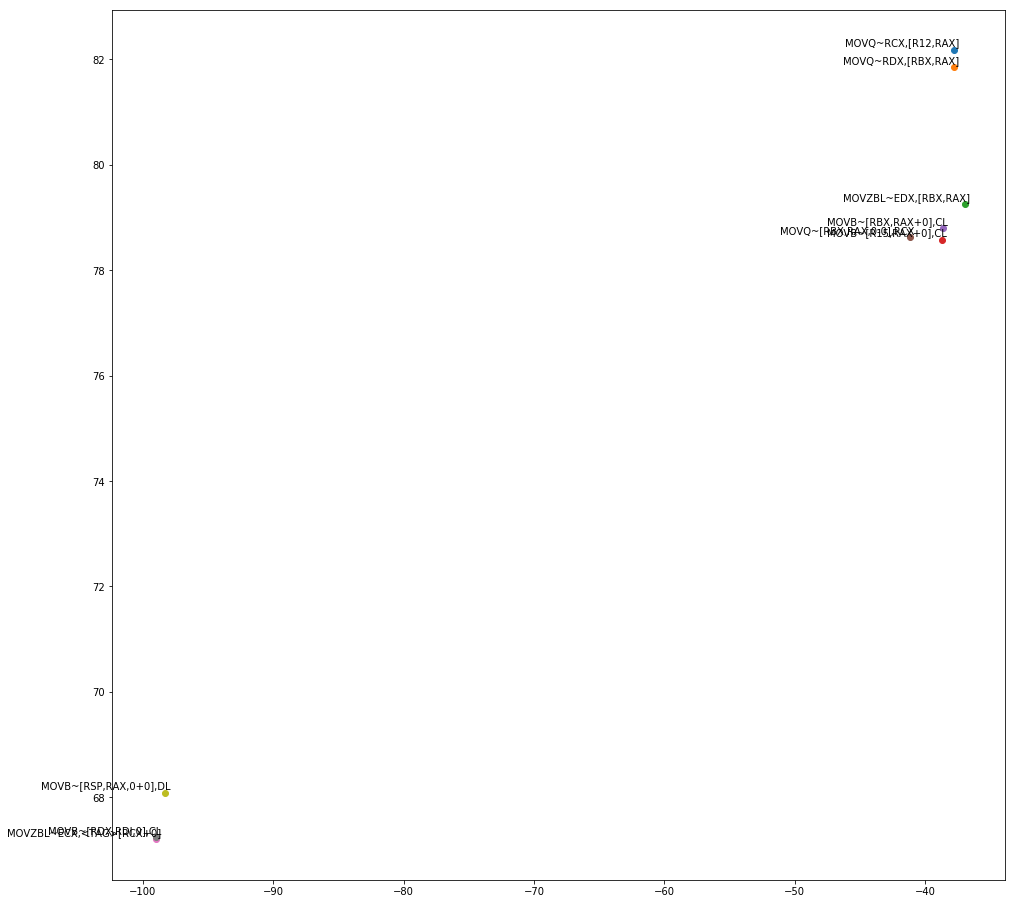

In [28]:
plt.figure(figsize=(16, 16)) 
index = find_index_from_label(instructions, labels)
my_points = new_values[index]

for i in range(len(my_points)):
    plt.scatter(my_points[i][0], my_points[i][1])
    plt.annotate(labels[index[i]],
                 xy=(my_points[i][0], my_points[i][1]),
                 xytext=(5, 2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')
plt.show()